# **Intent**
The analysis below is my first attempt to learn how to use python for data analysis. The project is based on an official dataset of the fleet of PKWs (Personenkraftwagen or, in english, passenger cars) per automaker in Germany between 01.01.2016 and 01.01.2020 by the Statistik des Kfz - und Anhängerbestandes of the German government. The original database can be accessed [here](https://www.govdata.de/daten/-/details/kfz-bestand-pkw-bestand-autoherstellerfirma-deutschland-stichtage-01-07-bis-2000-01-01-ab-2001).

By definition, PKWs are vehicles with at least two axles, their own power unit, and usually, four wheels, which are primarily intended for passenger transport. The majority of passenger cars are road vehicles used in public road transport. On 01.01.2020, there were over 46 million passenger cars in Germany, a ratio of 0.56 vehicles per person. 



# **1.0 Visualize Dataset**
First of all, it is important to check the dataset's attributes in order to identify the necessity for additional configuration. Here, because the dataset is small and very simple, there was no need for major edits. Only a couple of columns and rows were renamed for design reasons. 

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
#Define DataFrame
df = pd.read_csv("/content/drive/MyDrive/Datasets/PKW_DE.csv", sep=";", index_col='Unnamed: 0')
print(df)

                                pkw_2016  pkw_2017  ...  pkw_2019  Pkw-pkw_2020
Audi                             3091534   3172833  ...   3242547       3250452
BMW                              3451426   3555140  ...   3726989       3817513
Chevrolet (Daewoo)                244448    230447  ...    198631        179906
Citroen                           801251    800188  ...    794016        776967
Fiat                             1511988   1510958  ...   1528410       1552547
Ford                             3362452   3390105  ...   3451829       3508554
Honda                             480328    473815  ...    449531        431777
Hyndai                            935992   1025070  ...   1188782       1273164
Kia Motor                         554926    595071  ...    668219        705941
Mazda                             848268    849653  ...    858686        858428
Daimler-Chrysler/Merzedes-Benz   4458845   4575346  ...   4770915       4875512
Mitsubishi                        375084

In [ ]:
#Visualize Head
df.head()

,pkw_2016,pkw_2017,pkw_2018,pkw_2019,Pkw-pkw_2020
Audi,3091534,3172833,3223732,3242547,3250452
BMW,3451426,3555140,3637688,3726989,3817513
Chevrolet (Daewoo),244448,230447,214821,198631,179906
Citroen,801251,800188,797725,794016,776967
Fiat,1511988,1510958,1514178,1528410,1552547


In [ ]:
#Visualize Tail
df.tail()

,pkw_2016,pkw_2017,pkw_2018,pkw_2019,Pkw-pkw_2020
Skoda,1760728,1893636,2026295,2169706,2297729
Suzuki,435088,443283,458220,473411,487147
Toyota,1362557,1350218,1349778,1351709,1349764
Volkswagen,9740233,9886580,9981469,10038671,10087817
Volvo,453711,464644,472328,484123,505029


In [ ]:
#Check Quantity of Lines and Columns
df.shape

(22, 5)

In [ ]:
#Verify Type of Data
df.dtypes

pkw_2016        int64
pkw_2017        int64
pkw_2018        int64
pkw_2019        int64
Pkw-pkw_2020    int64
dtype: object

In [ ]:
#Verify Existence of Null Values
df.isnull().sum()

pkw_2016        0
pkw_2017        0
pkw_2018        0
pkw_2019        0
Pkw-pkw_2020    0
dtype: int64

# **1.1 Edit Dataset**

In [ ]:
#Rename Column
df = df.rename(columns={"Pkw-pkw_2020":"pkw_2020"})

In [ ]:
#Rename Cell
df = df.rename(index={"Daimler-Chrysler/Merzedes-Benz":"Daimler"})

In [ ]:
df = df.rename(index={"Chevrolet (Daewoo)":"Chevrolet"})

# **1.2 Data Extraction**

In [ ]:
#General Statistics of 2020
df["pkw_2020"].describe()

count    2.200000e+01
mean     2.107689e+06
std      2.262988e+06
min      1.799060e+05
25%      7.236975e+05
50%      1.257457e+06
75%      3.031814e+06
max      1.008782e+07
Name: pkw_2020, dtype: float64

In [ ]:
#Total Number of Passenger Vehicles in 2016
gt2016 = df["pkw_2016"].sum()
print(gt2016)

43789602


In [ ]:
#Quantity of Passanger Vehicles Per Person in 2016
pop = 83517045
vpp16 = gt2016 / pop
vpp16.round(2)

0.52

In [ ]:
#Total Number of Passenger Vehicles in 2020
gt2020 = df["pkw_2020"].sum()
print(gt2020)

46369166


In [ ]:
#Quantity of Passanger Vehicles Per Person in 2020
vpp20 = gt2020 / pop
vpp20.round(2)

0.56

In [ ]:
#Ratio of Total Quantity of Passenger Vehicles Per Automaker in 2020
ratio20 = df["pkw_2020"] / gt2020 * 100
df.groupby(df.index)["ratio20"].sum().sort_values(ascending=False)

Volkswagen    21.755442
Daimler       10.514556
Opel/GM        9.475342
BMW            8.232870
Ford           7.566567
Audi           7.009943
Renault        5.123875
Skoda          4.955295
Fiat           3.348231
Toyota         2.910909
Hyndai         2.745713
Seat           2.677965
Peugeot        2.336870
Mazda          1.851291
Nissan         1.844452
Citroen        1.675611
Kia Motor      1.522436
Volvo          1.089148
Suzuki         1.050584
Mitsubishi     0.993742
Honda          0.931173
Chevrolet      0.387986
Name: ratio20, dtype: float64

In [ ]:
#Verify If The Sum of Ratios is 100%
share20 = df["ratio20"].sum()
print(share20)

100.0


In [ ]:
#Herfindahl-Hirschmann Index in 2020
hhi20 = (df["ratio20"]**2).sum()
print(hhi20)

954.7239796265768


In [ ]:
#Create Variable With Total Quantity of Passenger Vehicles Per Automaker 
total = df["pkw_2016"] + df["pkw_2017"] + df["pkw_2018"] + df["pkw_2019"] + df["pkw_2020"] 

In [ ]:
#Create Column With Average Quantity of Passenger Vehicles Per Automaker
average = total / 5
df["average"] = average
print(df)

            pkw_2016  pkw_2017  pkw_2018  pkw_2019  pkw_2020    average
Audi         3091534   3172833   3223732   3242547   3250452  3196219.6
BMW          3451426   3555140   3637688   3726989   3817513  3637751.2
Chevrolet     244448    230447    214821    198631    179906   213650.6
Citroen       801251    800188    797725    794016    776967   794029.4
Fiat         1511988   1510958   1514178   1528410   1552547  1523616.2
Ford         3362452   3390105   3419000   3451829   3508554  3426388.0
Honda         480328    473815    462806    449531    431777   459651.4
Hyndai        935992   1025070   1107993   1188782   1273164  1106200.2
Kia Motor     554926    595071    631017    668219    705941   631034.8
Mazda         848268    849653    852747    858686    858428   853556.4
Daimler      4458845   4575346   4680507   4770915   4875512  4672225.0
Mitsubishi    375084    388635    408484    432920    460790   413182.6
Nissan        839801    856090    869267    866813    855257   8

In [ ]:
#Most Favorite Automakers in 2016
df.groupby(df.index)["pkw_2016"].sum().sort_values(ascending=False).head(5)

Volkswagen    9740233
Opel/GM       4718553
Daimler       4458845
BMW           3451426
Ford          3362452
Name: pkw_2016, dtype: int64

In [ ]:
#Most Favorite Automakers in 2020
df.groupby(df.index)["pkw_2020"].sum().sort_values(ascending=False).head(5)

Volkswagen    10087817
Daimler        4875512
Opel/GM        4393637
BMW            3817513
Ford           3508554
Name: pkw_2020, dtype: int64

In [ ]:
#Least Favorite Automakers in 2016
df.groupby(df.index)["pkw_2016"].sum().sort_values(ascending=False).tail(5)

Honda         480328
Volvo         453711
Suzuki        435088
Mitsubishi    375084
Chevrolet     244448
Name: pkw_2016, dtype: int64

In [ ]:
#Least Favorite Automakers in 2020
df.groupby(df.index)["pkw_2020"].sum().sort_values(ascending=False).tail(5)

Volvo         505029
Suzuki        487147
Mitsubishi    460790
Honda         431777
Chevrolet     179906
Name: pkw_2020, dtype: int64

# **1.3 Data Analysis**


The first graph displays the fleet of vehicles per automaker in the five years covered by the dataset. Volkswagen is the preferred manufacturer among germans, although the number of vehicles from the automaker did not change substantially in the period. Volkswagen is followed by Daimler (which surpassed GM in 2020 when compared to 2016), GM, BMW, and Ford. The least favorite automakers are Volvo, Suzuki, Mitsubishi, Honda, and Chevrolet. It is important to mention that both Chevrolet and Opel were owned by GM until 2017 and by Renault since then, which might impact market distribution, although not substantially. The number of cars remained virtually constant possibly because the dataset covers only a short period and vehicles are durable goods with a long lifetime. 

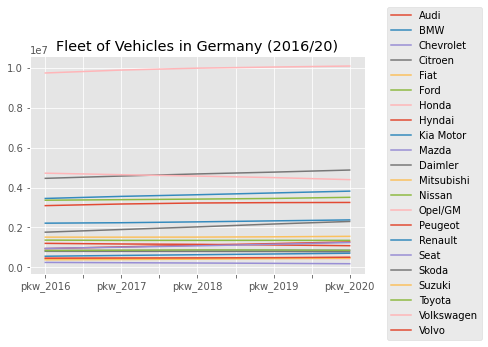

In [ ]:
#Line Graph of Fleet of Passenger Vehicles per Automaker 
df_new = df[['pkw_2016', 'pkw_2017', 'pkw_2018', 'pkw_2019', 'pkw_2020']].T
df_new.plot(title="Fleet of Vehicles in Germany (2016/20)")
plt.legend(bbox_to_anchor=(1.05, 1.25))

The two graphs below highlight the discrepancy between the market share of Volkwagen and the other automakers. VW alone is responsible for 21,8% of the market of passenger cars, followed by Daimler (10,5%), GM (9,5%), BMW (8,2%), and Ford (7,6%). It is important to note, however, that VW is not a monopolist. Although VW is responsible for more than 20% of the market, the Herfindahl-Hirschman index is less than 1500, which means the market is still competitive. VW's presence is counterbalanced by dozens of other players and, as a result, the market power is pulverized among these manufacturers.   

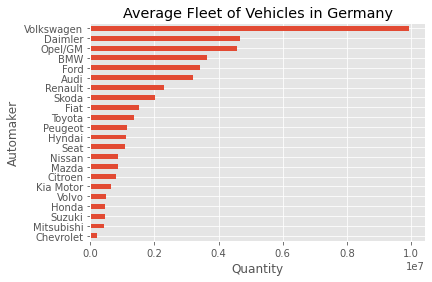

In [ ]:
#Horizontal Graph of Average Fleet of Passenger Vehicles per Automaker
df.groupby(df.index)["average"].sum().sort_values(ascending=True).plot.barh(title="Average Fleet of Vehicles in Germany")
plt.xlabel("Quantity")
plt.ylabel("Automaker");

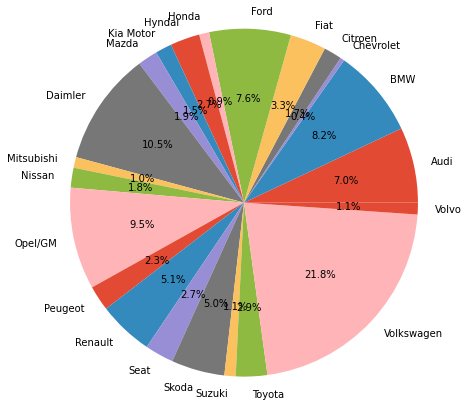

In [ ]:
#Pie Chart of Market Share in 2020
plt.pie(df["pkw_2020"], labels=df.index, radius=2, autopct='%0.1f%%')
plt.show()